# Introduction to Linear Regression
## The fundamentals


## Overview

* Approximating the data-generation function
* Defining the line of best fit
* From line-of-best fit to linear regression
* Interpreting the parameter values
* Evaluation with performance metrics

## What is linear regression?

Imagine we wanted to predict house prices from variables that describe each house, such as the total floorspace.

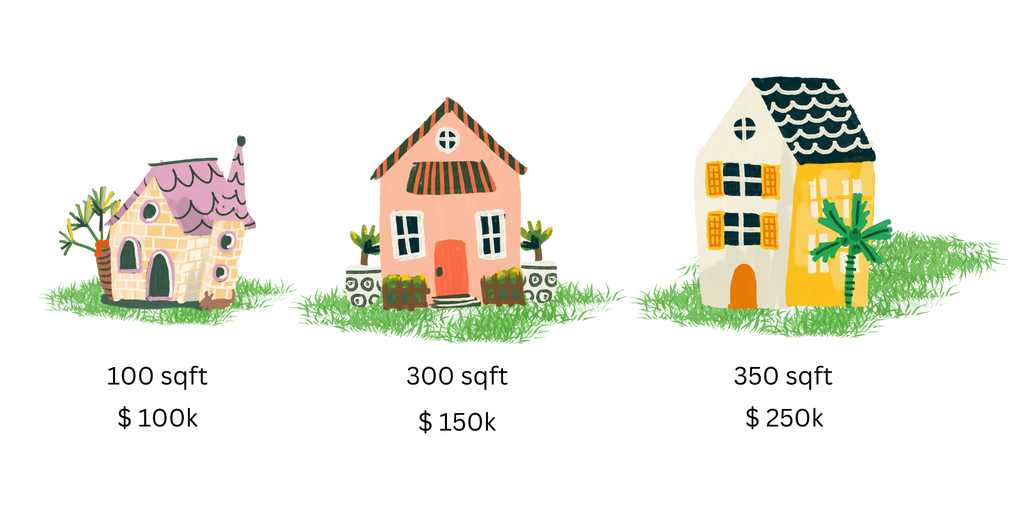

*Linear regression*: models relationships between *scalar repsonse* and one or more *explanatory variables*

### Two purposes:
- *Hypothesis testing*: Testing for **relationships** between explanatory variables and response, given a data sample
- *Forecasting*: Making **predictions** about the value of the response for new values of the explanatory variables


#### History of Linear regression

- Developed in the late 19th century. 
- <span class="footnote" id="fn_1"> <a href="https://priceonomics.com/the-discovery-of-statistical-regression/">With multiple "inventors"...</a></span>
- Used in multiple fields.
- For forecasting, it acts as a supervised regression machine learning model, but more on that another time!

## The data-generation function


We can imagine a process to generate real data as:

$$
y=f(\boldsymbol{x}),
$$ 

where:

* $\boldsymbol{x}$ is a vector of variables,

* $f$ is an unknown function, known as the *data-generation function* (or process), 

* and $y$ is the continuous *scalar* output.



Our goal is to find a good approximation of the data generating function 
$\hat{f} \approx f$
which can be used to generate new approximations of our output:

$$
\hat{y}=\hat{f}(\boldsymbol{x})
$$

such that $\hat{y} \approx y$.

### Univariate problems

We will make things simple, by first thinking about *univariate problems* like the house price prediction above, where $x$ is a single (scalar) variable. 

* In our example, $x$ is the floorspace of the house, and $\hat{y}$ is our predicted price.



We could try and solve this problem by plotting a scatter plot of house prices against floorspace, and finding a straight line that goes through the data. 

* Our predictions are then just the values on the line

* This is effectively what we do in Linear regression!

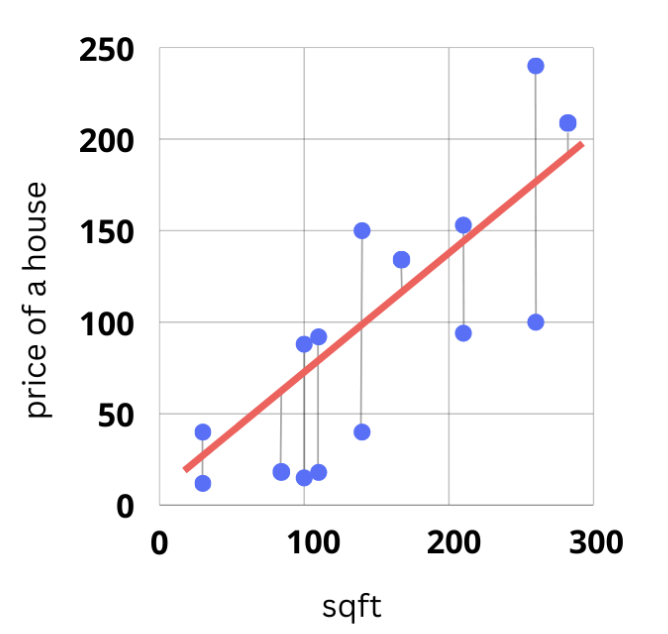

In univariate linear regression the data generating function is approximated as the equation of a line:

$$
\hat{y} = \hat{f}(x) = w x + b,
$$

where: 

* $w$, known as the *weight*, is the positive or negative gradient of the line, which determines how much the value of $y$ changes, relative to $x$, and
* $b$, known as the *bias*,  is the y-intercept.


Note, for *hypothesis testing*, we care about the values of $w$ and $b$ just as much as the predictions $\hat{y}$!

### The line of best fit

Multiple lines are possible with different values of $w$ and $b$ - how do we choose the best values for $w$ and $b$?
  * This is equivalent to finding the *line of best fit*!



The graph below shows 3 possible lines with different $w$ and $b$ values
  * Note: Only positive gradients are shown in this example but negative gradients are also possible.

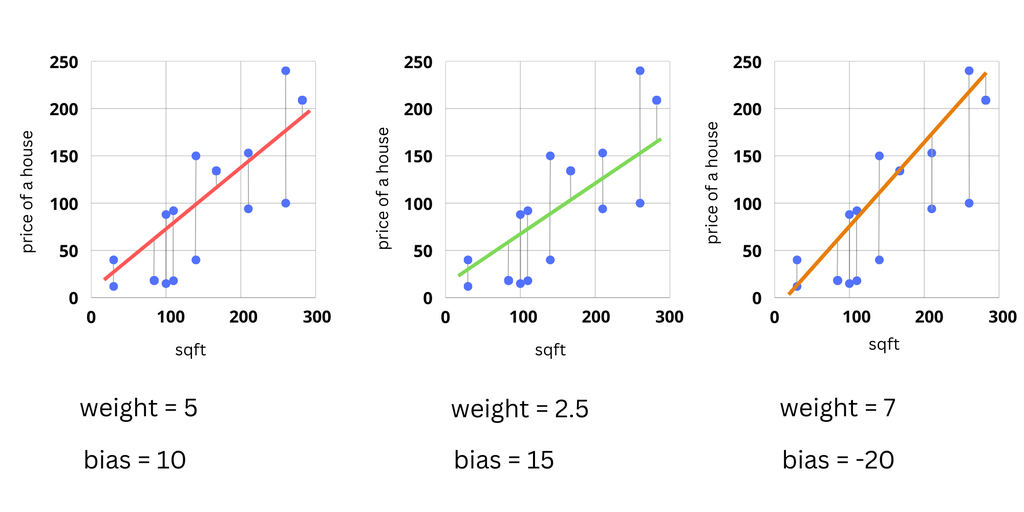

### How to find the line of best fit?

We can find the line of best fit visually by evaluating the *residuals*.

* Residuals (or errors) are represented in the graph above as vertical lines between $y$-values for each observation and the corresponding prediction (on the candidate line) $\hat{y}$. 

* The line of best fit aims to minimise these residuals. 
  



We can also represent this with algebra. 

* For a data point $i$, the absolute value of the residuals is given by $|y_i-\hat{y}_i|$

* For a dataset of $N$ observations, the sum of the absolute values of the residuals (called the Sum of Absolute Errors, SAE), is then given by:

$$\begin{aligned} \operatorname{SAE} &= \sum_{i=1}^{N}|y_i - \widehat{y}_i| \\ &=\sum_{i=1}^N|y_i-\left(w x_i + b\right)| \end{aligned}$$



* If for example the absolute error for each line is:

    - Red line = 20

    - Green line = 30

    - Orange line = 36

* *The line of best fit* will be the red line which has $w$ and $b$ that minimise the absolue error.

### Mean-squared error

In the above example, we minimised the sum of the *absolute* errors, SAE. 

It is often preferable to instead minimise the sum of the *squared* errors (SSE):

$$\operatorname{SSE} = \sum_{i=1}^{N}(y_i - \widehat{y}_i)^2 \quad$$



Note also, that minimising the sum is equivalent to minimising the mean value, which has the benefit of being normalised to different dataset sizes. 

We therefore typically talk about Mean Squared Error (MSE):

$$\operatorname{MSE} = \frac{1}{N}\sum_{i=1}^{N}(y_i - \widehat{y}_i)^2 \quad$$

* Note, SAE, SSE, and MSE can all be considered as different loss functions $L(\boldsymbol{y}, \hat{\boldsymbol{y}})$

### Finding optimal parameters

Instead of guessing and testing lots of values for $w$ and $b$ and as we did in the above example, we can try to find the optimal values $w^*$ and $b^*$ directly

* We want to find the values of $w$ and $b$ which minimise the error term. For MSE, the optimisation problem for $w$ can be formally written as:

$$
\renewcommand{\argmin}{\arg\!\min}
w^* = \argmin_{w} \frac{1}{N}\sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2
$$

* A similar problem can be written for $b$ 



* More generally, for loss term $L$, we can write the problem as:

$$
w^* = \argmin_{w} L(\boldsymbol{y}, \hat{\boldsymbol{y}})
$$

* These optimisation problems can be solved with *gradient descent*!

#### What is gradient descent?

* Gradient descent is an optimisation algorithm that is also used to find optimal values that minimises a function
  
* At the simplest level, the algorithm iteratively adjusts the values until the function is minimised
  
* In our case, the values are the parameters, and the function is the error term

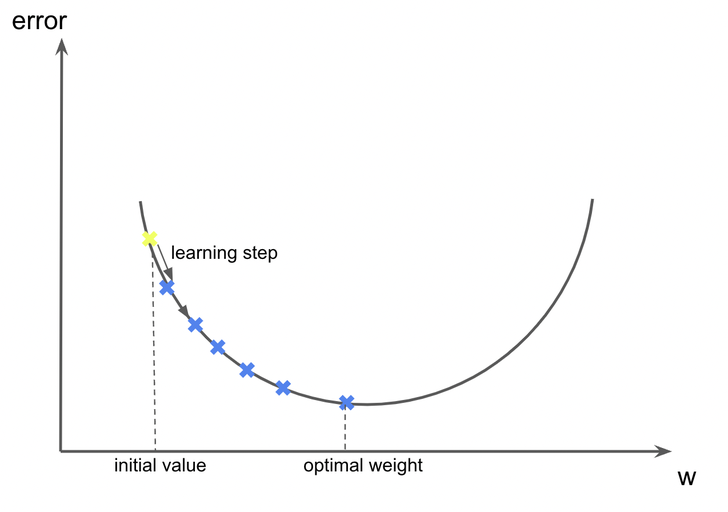

There are four elements needed to perform gradient descent:

1. a way to calculate the gradient of the function, which determines which direction to step in in each iteration,
2. a step size, that determines how far to step in the direction of the gradient in each iteration, 
3. an initial guess of the values, and
4. a stopping criterion, that determines when to stop the algorithm.

Let's consider each of these elements when for finding the optimal value of $w$ and $b$

#### Gradient

The gradient of the loss function tells us in which direction we should change the parameter value.

* To find $D_w$, the gradient function for $w$, we can differentiate the loss function $L$ with respect to $w$

$$
\begin{aligned} 
D_w(w) &= \frac{\partial L}{\partial w} \\
&= \frac{\partial}{\partial w}\frac{1}{N}\sum_{i=1}^N\left(y_i-\hat{y}_i\right)^2 \\
&= \frac{\partial}{\partial w}\frac{1}{N}\sum_{i=1}^N\left(y_i-\left(w x_i + b\right)\right)^2 \\
&= \frac{-2}{N}\sum_{i=0}^N x_i\left(y_i-\hat{y}_i\right)
\end{aligned}
$$




* We can similarly define $D_b$:
$$
\begin{aligned} 
D_b(b) &= \frac{\partial L}{\partial b} \\
&= \frac{\partial}{\partial b}\frac{1}{N}\sum_{i=1}^N\left(y_i-\left(w x_i + b\right)\right)^2 \\
&= \frac{-2}{N}\sum_{i=0}^N \left(y_i-\hat{y}_i\right)
\end{aligned}
$$

#### Step size

The step size tells us how far to step in the direction of the gradient when changing the parameter values in each iteration. 

* For now we will consider a fixed step size $\eta$, e.g. 0.0001.

#### Initial guess of the values

We need initial guess for the parameter values, which we will call $w_0$ and $b_0$. 

* For now, we can simply use zero! 

#### Stopping criterion

We also need to know when to stop running the algorithm. 

* For now, use a fixed number of iterations, e.g. 100000

#### Putting the elements together

We now have everything we need to find our optimal parameters. 

For each iteration $i$, we calculate the new values of the parameters $w_i$ and $b_i$ as:

$$
\begin{aligned}
w_i &= w_{i-1}-\eta D_{w}(w_{i-1}) \\
b_i &= b_{i-1}-\eta D_{b}(b_{i-1})
\end{aligned}
$$

### Putting it into practice in Python

We've seen the maths, but how would we implement gradient descent in Python?

The following example will go through these steps. 

#### Data generation

As we saw, when we use real data, the data generating function is unknown.

To solve this, we can define our own data generating function and use it to create *synthetic data*!

We can specify a linear model with additive random noise

$$ y = x+50+\varepsilon, $$

where $\varepsilon \sim N(0,10)$.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To make sure randomly generated data results are the same each time:
np.random.seed(5)

# Generate monotonic increasing values for x, 1 to 100
x = np.linspace(1,100, 100)

# Add random noise to each x, to get a y value
y = np.array([i + 50 + np.random.normal(loc=0, scale=10) for i in x])

sns.scatterplot(x=x, y=y);

#### Gradient descent

Now we have our data, we can now perform gradient descent. 

Remember, because we know the data generating process, we know the *true values* of $w$ and $b$ - try to work out what they are!

In [ ]:
# Initial values for the weight and bias
w = 0
b = 0

eta = 0.0001  # The learning rate
iterations = 100000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of observations in X

# Performing Gradient Descent 
for i in range(iterations): 
    y_pred = w*x + b  # The current predicted value of Y
    D_w = (-2/n) * sum(x * (y - y_pred))  # Derivative wrt w
    D_b = (-2/n) * sum(y - y_pred)  # Derivative wrt b
    w = w - eta * D_w  # Update w
    b = b - eta * D_b  # Update b
    
print(f'w: {w:.2f}, b: {b:.2f}')

Our implemented gradient descent algorithm gives us $w = 1.01$ and $b = 50.42$ when we round to 2 decimal places. Not bad!

#### Visualising our solution

We can create a scatter plot of the data ($x$ and $y$) and plot the predicted values $\hat{y}$ for each observation.

In [ ]:
# Creating predictions for the original data x according to the function for the line of best fit
y_pred = w*x + b

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color='red')  # line of bets fit in red
plt.show()

### Generating predictions 

Now we have a model, we can use it to generate predictions for previously unseen values of $x$. 

* These could be in the range of the data we have seen before - known as *interpolation* 

* or outside the range of the observed data - known as *extrapolation*

In [ ]:
print('Interpolation: \n')

for x_new in [5.75, 53.5, 76.3]:
    y_new_pred = w*x_new + b
    print(f'\t x: {x_new}, y_pred: {y_new_pred:.3f}')


print('\n\nExtrapolation: \n')
for x_new in [105, 228.9, 1507]:
    y_new_pred = w*x_new + b
    print(f'\t x: {x_new}, y_pred: {y_new_pred:.3f}')

#### Evaluating our solution

As we controlled the data generating process, we know the true model is linear, and so our linear regression model is a good fit. But how can we quantify this?

* We could calculate the MSE for our solution with these optimal parameters:

In [ ]:
# Calculate the MSE for this line of best fit
def mse(y, y_pred):
    return np.mean((y-y_pred)**2)

print(f'MSE for gradient descent: {mse(y, y_pred):.3f}')

However, on its own this value does not tell us much. To deal with this, we often quote a different value, called the *coefficient of determination*, or $R^2$.

### Coefficient of determination

The coefficient of determination $R^2$ tells us how much of the total variation of the outcomes of the data (i.e. $y$ values) i explained by the model. 

* In other words, it describes how well the model represents the data. 

$$
R^2 = 1 -  \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}, 
$$

where $\bar{y}$ is the mean value of the outcome. 

Let's break that formula down!

* You've seen the numerator $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ before - it's the SSE

    * This measures how close the model predictions are to the true values

* The denominator $\sum_{i=1}^{n} (y_i - \bar{y})^2$ is then the *total sum of squares*
  
    * This is proportional to the variance of the data

* The ratio is then a scaled measure of performance - how close the model predictions are to the true values scaled by the inverse of the variance

  * If the variance of the data is low, we penalise the model more for discrepancies
  
  * If the variance is high, we penalise it less


#### $R^2$ in Python

Let's calculate the $R^2$ value for our Python example

In [ ]:
def rsquared(y, y_pred):
    return 1 - np.sum((y-y_pred)**2)/np.sum((y-np.mean(y))**2)

print(f'r-squared value: {rsquared(y, y_pred):.3f}')

Great! But what does this actually mean?

#### $R^2$ interpretation

To understand $R^2$ better, let's think about two extreme examples. 

$$
R^2 = 1 -  \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}, 
$$

1. The model predictions are exactly equal to the true values - $\hat{y}_i = \bar{y}~\forall~i$ such that $R^2=1$

2. The model predictions are equal to the mean - $\hat{y}_i = \bar{y}~\forall~i$ such that $R^2=0$

* $R^2$ typically has a range of 0 to 1

* A value of 1 indicates a perfect fit
  
* Values close to 1 suggests the model is able to explain most of the variability in the data, and so is a very close fit to the data

* Values close to 0 suggests the model is not able to explain much of the variability in the data, and so is a poor fit to the data

* A value less than 0 is possible, but is an indication that the model is predicting worse than just always predicting the sample mean (i.e. only including the bias term, with no weights) - indicating something has likely gone wrong!



## Multivariate linear regression: Expanding to multiple dimensions

Imagine we wanted to include another variable in our house price prediction problem - the number of bedrooms! 

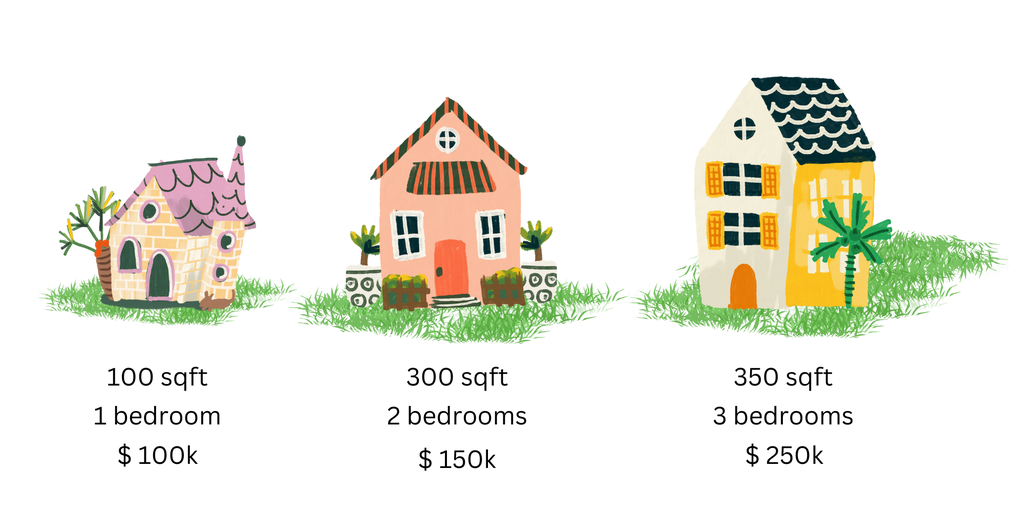

Whilst we've looked so far at the univariate case, we can easily extend our definition of linear regression to include multiple explanatory variables.

We will slightly change our notation, to make it more general. 



Recall, in the univariate case, we had:

$$
\hat{y} = wx+b
$$

For the multivariate case, the equivalent formula can be written as 

$$
\hat{y}=b + \sum_{j=1}^J w_j x_j,
$$

where:

* $J$ is the number of explanatory variables in the model,
* $x_j$ is the value of the $j$th explanatory variable,
* $w_j$ is the corresponding weight of the $j$th explanatory variable, and 
* $b$ is the bias term, or intercept. 



For *multivariate linear regression* we switch the notation slightly, so that each parameter is represented by $\beta_j$ (note, you will also sometimes see $\theta$ being used). The bias term is then represented by $\beta_0$. 

The equation for the multivariate case can be written in vectorized form. If we consider $𝑥_0=1$, then the above can be represented as matrix multiplication using linear algebra.
$$
\hat{y}=\beta^T x
$$
where 
$$
x = \begin{bmatrix}
    x_{0},\
    x_{1},\
    \ldots,\
    x_{J}
\end{bmatrix} \ and \ 
\beta=\begin{bmatrix}
    \beta_{0},\
    \beta_{1},\
    \ldots\,
    \beta_{J}
\end{bmatrix}
$$

The loss function and gradient updates introduced in the univariate case remain unchanged for the multivariate case.

#### Gradient descent for the multivariate case

The neat thing is that, except for changing the notation slightly, nothing else changes from the univariate case.

Exactly the same maths is used to find our optimal parameters - there is just more of them!

Note: our model will no longer be a line of best fit. Instead it is a *hyperplane* that cuts across the input *space*.

In the practical, we will write the code to get the weights for the best fit for the 2D case using gradient descent.

## Linear regression: Interpretation

So far we've shown:

1. How to fit a linear regression model to data
2. How to use the model to generate new predictions for interpolation and extrapolation
3. How to evaluate the model fit

However, as mentioned, a key output of the linear regression model are the parameters themselves!

#### Optimal parameters are informative

* $\beta_j$ is the amount we expect $y$ to change, given a single unit change in $x_j$
  
* $\beta_j$ has both a sign (positive or negative impact) and magnitude (scale of impact)
  
* Larger $\beta_j$ means $x_j$ has high impact on $\hat{y}$ - can tell us relative importance of different variables
  
* $\beta_0$ is the expected mean value of $y$ when all input features equal 0

### Hypothesis testing

With some extra maths, parameter values can be even more useful!

* In practice, when we fit linear regression models we often estimate both expected parameter values and their *standard deviation*

* This allows us to perform formal significance tests

  * *Wald test* or $t$-test on parameter values - e.g. is a parameter significantly different from 0 at 5% significance level?
  
  * Equivalent to asking *"Does this variable have significant impact on the output?"*

This is a huge advantage of linear regression models that we don't have with other machine learning models, and explains why these models are still used extensively in research and practice today! 

If you are interested, here are some additional resources on significance testing and p-values: [Book](https://hastie.su.domains/Papers/ESLII.pdf), [Video](https://www.youtube.com/watch?v=7ArmBVF2dCs)

#### The $F$-test of overall significance


* The $F$-test of overall significance indicates whether your linear regression model provides a better fit to the data than a model that contains no explanatory variables (intercept-only model).

* This intercept-only model will only predict the mean of the data for each observation.

    - $F$-tests evaluate multiple model terms simultaneously, which allows them to compare the fits of different linear models. 

    - In contrast, the Wald test evaluate just one parameter at a time.





* The $F$-test for overall significance has the following two hypotheses:

    - The null hypothesis states that the model with no independent variables fits the data as well as your model.
  
    - The alternative hypothesis says that your model fits the data better than the intercept-only model.

* The hypotheses can also be expressed as:

    - H0: $\beta_1 = \beta_2 = … = \beta_J = 0$

    - H1: At least one $\beta_j \neq 0$



* The sum square of residuals of the restricted model(SSE)

$$\operatorname{SSE} = \sum_{i=1}^{N}(y_i - \widehat{y}_i)^2 \quad$$


* The sum square of residuals of the intercept-only model model(SSR)

$$\operatorname{SSR} = \sum_{i=1}^{N}(y_i - \bar{y}_i)^2 \quad$$

* Where $\bar{y}$ is the mean of the response $y$

* The F-statistic can be calculated as:

$$
F_{\textrm{Statistic}} = \frac{\textrm{SSR} / J}{\textrm{SSE} / (N - J - 1)}
$$


* Since the sum square of residuals (SSR) is unitless, dividing by $J$ in the numerator and $N-J-1$ in the denominator lets us form a distribution that can be comparable. These two also happens to be our degrees of freedom.

    - $J$: Number of features

    - $N$: Number of observations
    




* Recall 

$$
\begin{aligned}
R^2 &= 1 -  \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \\
&= 1- \frac{\textrm{SSE}} {\textrm{SSR}} \\
&= \frac{\textrm{SSR}-\textrm{SSE}} {\textrm{SSR}} \\
&= 1- \frac{\textrm{SSE}} {\textrm{SSR}} \\
&= 1 - \left(1 + F \cdot \frac{J-1}{N-J}\right)^{-1}
\end{aligned}
$$

* This equation shows the relationship between $R^2$ and $F_{\textrm{Statistic}}$: a larger $R^2$ results in a higher value of $F_{\textrm{Statistic}}$. In other words, a linear model which fits the data well has a larger $F_{\textrm{Statistic}}$.

### Example: Hypothesis tests in Python

We can use the package `statsmodels.api` to get the $F$-statistic and $R^2$ score:

In [ ]:
# Import the package
import statsmodels.api as sm

X = sm.add_constant(x)
results = sm.OLS(y, X).fit()

# Get the overall results for the multivariate model
print(results.summary())

# Get only the results for the F-statistic and it's corresponding p-value
F = np.identity(len(results.params))
F = F[1:,:]

print(results.f_test(F))

### Interpretation of the results:

* Each weight and the bias term have $p$-values < 0.05/2 (two-tailed test) so we can reject the null hypothesis at a 5% level of significance and conclude that each parameter is significantly different from zero.

* The $F$-statistic is 947.3 and its corresponding $p$-value is very close to 0 so we would reject the null hypothesis at a 5% level of significance as the $p$-value<=0.05. 

* This means that the overall model is significant.

* Now we can look at the $R^2$ score which is 0.906. 

* This means that 90.6% of the variation in the response variable is explained by the mutivariate linear regression model.

## Linear regression evaluation: Correlation vs Causation 

### P-Hacking: How to Know Your Predictive Discovery Is Conclusive

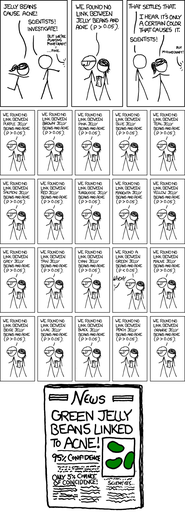

* The above comic (from [xkcd](https://www.explainxkcd.com/wiki/index.php/882:_Significant)) is an illustration if one pitfall with significance testing

* If you test 20 hypotheses at a 5% significance level, the chance of *not* having a false positive is under 36%
  
* Scientists should start with a well-motivated hypothesis which is put to the test in an experiment. 

* Honest science demands that researchers begin any investigation with a clear, motivated hypothesis – for example "*we have reason to believe that this particular chemical causes this type of cancer*" 
  
* For this reason, deliberate p-hacking is considered to be highly unethical.

* However, it is **VERY EASY** to inadvertently perform $p$-hacking when setting up experiments - significance testing requires very fine attention to detail!

* This can have very serious implications, see this [newspaper article](https://www.theguardian.com/commentisfree/2010/apr/10/bad-science-dutch-nurse-case) about a Dutch nurse, who was convicted of murder on the basis of significance testing. 